In [1]:
"""
Compute julia set with paramter variaton for live view
and video generation
"""
#prerequisites ...
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from numba import jit



In [2]:
#########################
# julia set computation function
@jit
def julia_numba(N,cr,ci):
    T = np.empty((N, 2*N), dtype=np.uint8)
    # for some reason the code does not work if we use just the
    # second array (TC) and a simple point as accumulator
    TC = np.empty((N, 2*N,3), dtype=np.uint8)
    cmap = np.empty((N,3),dtype=np.uint8)
    # generate the colormap locally. Using a global cmap
    # is much slower
    for i in range(256):
        #cmap[255-i] = np.dot(plt.cm.nipy_spectral(i)[0:3],255)
        cmap[i] = np.dot(plt.cm.rainbow(i)[0:3],255)
        
    h = 2.0/N
    for J in range(N):
        for I in range(2*N):
            zimag = -1.0 + J*h
            zreal = -2.0 + I*h
            T[J,I] = 0
            zreal2 = zreal*zreal
            zimag2 = zimag*zimag
            while (zimag2 + zreal2 <= 4) and (T[J,I] < 255):
                zimag = 2* zreal*zimag + ci
                zreal = zreal2 - zimag2 + cr
                zreal2 = zreal*zreal
                zimag2 = zimag*zimag 
                T[J,I] += 1
            # update tc
            TC[J,I] = cmap[T[J,I]]
                
    return TC



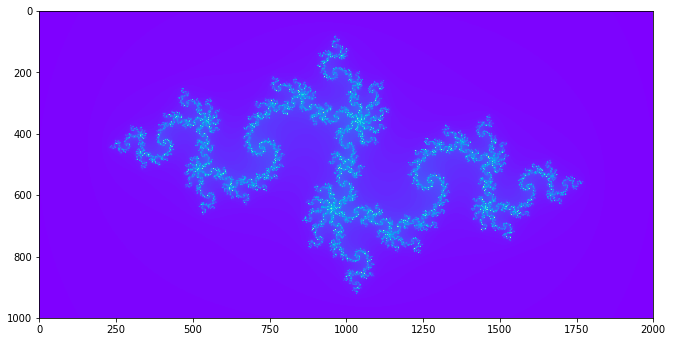

In [3]:
#########################
# main part
N = 1000
creal = -0.835
cimag = - 0.2321
dpi = 96
width = 1+ N//dpi
height = 1+ N//dpi

#create the figure
fig, ax = plt.subplots(figsize=(width, height),dpi=72)

z = julia_numba(N,creal, cimag)
ax.imshow(z)    # don't use a color map here,
                    # we get a color image back
plt.show()

